In [ ]:

# Goal: The ultimate goal of the project is to conduct a complete analysis of Blackmore's data set in hopes of finding
# a coorelation between exercise and eating disorders. To do this I will be downloading the dataset into Jupyter and
# compare the different variables in the data set in order to gain a greater understanding about how different factors
# (specifically age and exercise) affect eating disorder patients. To do this, I will be using a variety of libraries
# to cross analyze the data and draw conclusions regarding exercise and eating disorders based on the results. 

# Database: I will be analyzing Blackmore's data (https://r-data.pmagunia.com/dataset/r-dataset-package-car-blackmore)
# which includes 945 total data entries, 586 of those entries are eating disorder patients (all anorexia) while 359 are 
# control participants. Additionally, the data includes 4 different categories being: subject number, age, weekly hours of
# exercise, and group (patient or control). This is an ample amount of data which will give me the ability to make detailed
# conclusions about the correlation between age, exercise, and eating disorders.

# Meathodology: All of the work done in this project will be using python and these libraries:
# NumPy: NumPy will be used to assist the other libraries in creating arrays and aranging properties.
# MatPlotLib: MatPlotLib will be used to create graphs with certain proporties to visualize data. 
# Pandas: Pandas will be used to read my data set and may be used to assist in graph making. 
# Seaborn: Seaborn's versatility will be used to create graphs for specific purposes in a simple manner.
# SciPy: SciPy will be used to calculate the statistical significance of certain aspects of the data to draw conclusions.
# Plotly: Plotly will be used to produce advanced graphs to give me a new perspective on the data.

# Conclusion: While not all of my results were statistically significant, there are takeaways from my findings. Firstly,
# there is a heavy coorelation between eating disorders and exercise. While exercise is healthy, when being used to reach
# an unhealthy standard, it becomes counterproductive. With this knowledge, we can assume eating disorder patients are
# using exercise to supplement their eating habits in order to reach a self-imposed standard. While little to no exercise
# made up the majority of the population for both groups, eating disorder patients were much more likely to have extremely
# high levels of exercise, further supporting the claim some use it as a tool to reach unhealthy ideals. All and all,
# the aim of my research was to give an unbiased view on the coorelation of exercise and eating disorders to hopefully
# give these individuals and their families insight into this disorder.

# Notes:
# * Ages 8-10 are not entered as floats in the data set leading to irregular age graphs. 
# * Many data points for t-statistics and p-values could not be calculated for the relationship between age and exercise 
# b/c of / by 0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
import plotly.express as px
from scipy import stats

df = pd.read_csv('Blackmore.csv')

In [25]:

sns.set_theme()
df.info()
# 945 total entries
# 4 Categories:
# 1 - Subject Number
# 2 - Age
# 3 - Weekly Hours of Exercise Per Week
# 4 - Eating Disorder Patient or Control Participant

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  945 non-null    int64  
 1   subject     945 non-null    object 
 2   age         945 non-null    float64
 3   exercise    945 non-null    float64
 4   group       945 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 37.0+ KB


In [26]:
# Calculate the number of participants in each group. 

# Set up initial counts
patient_count = 0
control_count = 0
i = 0

# Create a while loop
while i < len(df):
    if df['group'][i] == 'patient': # separate group into pantient
        patient_count += 1 # When patient is recognized, add one to the counter
    elif df['group'][i] == 'control': # separate group into control
        control_count += 1 # When control is recognized, add one to the counter
    i += 1

# print final numbers
print(f"Number of participants in the patient group: {patient_count}")
print(f"Number of participants in the control group: {control_count}")
    

Number of participants in the patient group: 586
Number of participants in the control group: 359


In [27]:
# Mean Min Max of Age and Exercise
exercise_mean = df['exercise'].mean()
age_mean = df['age'].mean()
# Exercise - 2.53 Hours/Week
# Age - 11.44
exercise_min = df['exercise'].min()
age_min = df['age'].min()
# Exercise - 0 hours/Week
# Age - 8
exercise_max = df['exercise'].max()
age_max = df['age'].max()
# Exercise - 29.96 Hours/Week
# Age - 17.96

print(exercise_mean)
print(age_mean)
print(exercise_min)
print(age_min)
print(exercise_max)
print(age_max)



2.530645502645501
11.44166137566137
0.0
8.0
29.96
17.92


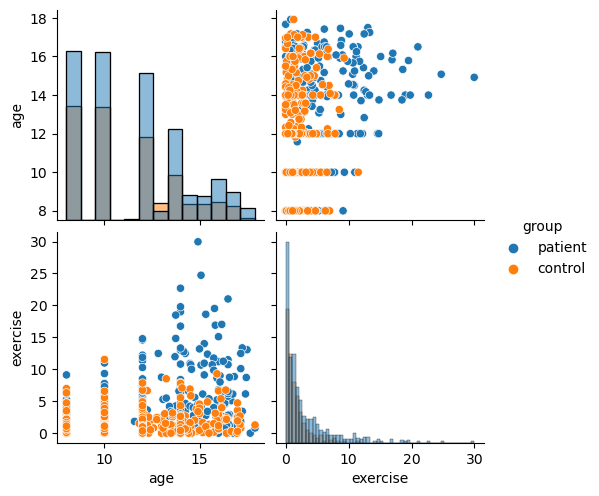

In [3]:
# Summary of the data
# Create a pairplot to tie all the data together
sns.pairplot(df, vars=["age", "exercise"], hue="group", diag_kind="hist")
plt.show()

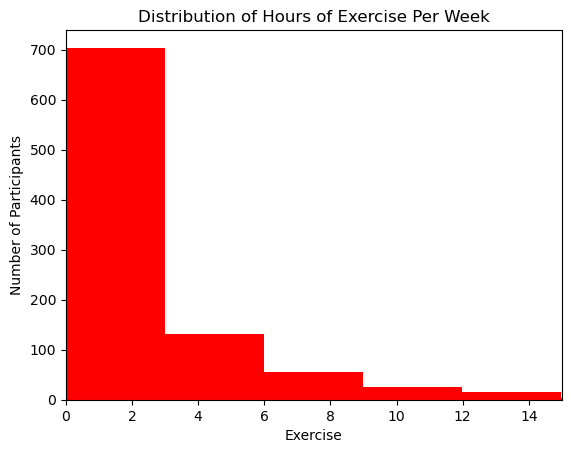

In [4]:
# Create a histogram for the distribution of exercise 
plt.hist(df['exercise'], color='red') # isolate data to exercise group and set color
plt.xlim(0,15) # Create a limit on the x axis

#Create titles and labels
plt.title('Distribution of Hours of Exercise Per Week')
plt.xlabel('Exercise')
plt.ylabel('Number of Participants')
plt.show()

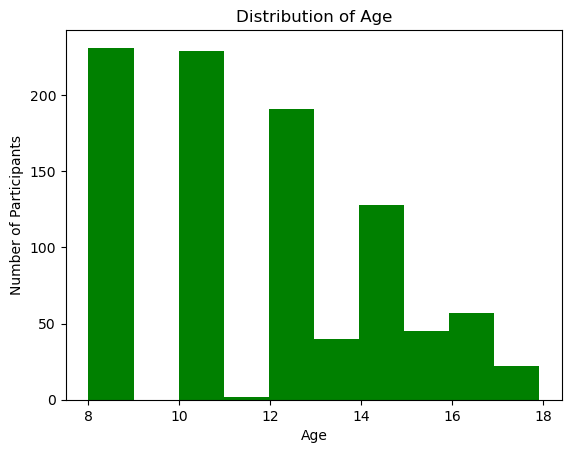

In [5]:
# Create a histogram for the distribution of age
plt.hist(df['age'], color='green') # isolate data to age group and set color

# Create Titles and labels
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.show()

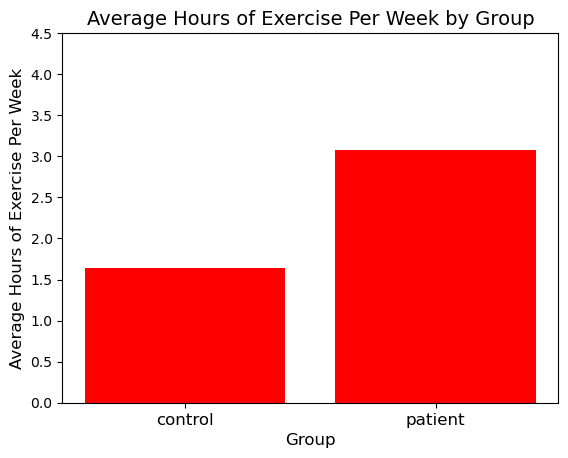

In [6]:
# Bar Graph of the average Amount of Exercise by Group
# Group by "group" and calculate mean exercise level
g = df.groupby("group")
avg_group = g["exercise"]
avg_hours_of_exercise = avg_group.mean()

# Create a bar graph
plt.bar(avg_hours_of_exercise.index, height=avg_hours_of_exercise.values, color='red')

# Create labels and title
plt.xlabel('Group', fontsize=12)
plt.ylabel('Average Hours of Exercise Per Week', fontsize=12)
plt.title('Average Hours of Exercise Per Week by Group', fontsize=14)

# Set ticks
plt.xticks(avg_hours_of_exercise.index, fontsize=12)
plt.yticks(np.arange(0, 5, 0.5))

# Show the graph
plt.show()


In [7]:
# Calculate mean
avg_group.mean()

group
control    1.640641
patient    3.075887
Name: exercise, dtype: float64

In [33]:
# Perform t-test to calculate statistical significance in exerciese difference between control and patient groups
def perform_t_test_exercise(df):
 # create variables representing the group and level of exercise
    control_exercise = df[df["group"] == "control"]["exercise"]
    patient_exercise = df[df["group"] == "patient"]["exercise"]
    # identify specific tests for the created variables
    t_statistic, p_value = ttest_ind(control_exercise, patient_exercise)
    return t_statistic, p_value

#print and format the results
t_statistic, p_value = perform_t_test_exercise(df)
print("t-statistic: ", t_statistic)
print("p-value: ", p_value)

# Result:
# t-statistic:  -6.2492856144343785
# p-value:  6.235439286821911e-10
# t-statistic indicates control group has an average exercise level much lower than the mean
# p-value indicates a high degree of statistical significance


t-statistic:  -6.2492856144343785
p-value:  6.235439286821911e-10


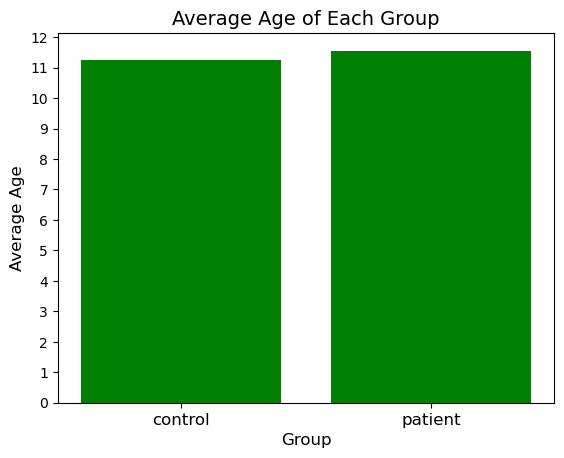

In [8]:
# Bar Graph of the average age by Group
# Group by "group" and find average age
a = df.groupby("group")
avg_age = a["age"]
avg_age_by_group = avg_age.mean()

# Create a bar graph
plt.bar(avg_age_by_group.index, height=avg_age_by_group.values, color='green')

# Create labels and title
plt.xlabel('Group', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.title('Average Age of Each Group', fontsize=14)

# Set ticks
plt.xticks(avg_age_by_group.index, fontsize=12)
plt.yticks(np.arange(0, 13, 1))

# Show the graph
plt.show()

In [9]:
# Calculate the mean
avg_age.mean()

group
control    11.257660
patient    11.554386
Name: age, dtype: float64

In [14]:
# Calculate the mean exercise levels for each age group
df['age_rounded'] = df['age'].round(0) # Isolate the data to only age and round to the nearest whole number
for age, group in df.groupby('age_rounded'):
    mean_score = group['exercise'].mean() #calculate the mean exercise of each age group
    print(f"Age group {age}: Average exercise level per week is {mean_score:.5f} hours.") # Print and format the Results

Age group 8.0: Average exercise level per week is 1.25918 hours.
Age group 10.0: Average exercise level per week is 1.74563 hours.
Age group 12.0: Average exercise level per week is 2.28926 hours.
Age group 13.0: Average exercise level per week is 2.77231 hours.
Age group 14.0: Average exercise level per week is 3.66273 hours.
Age group 15.0: Average exercise level per week is 5.94732 hours.
Age group 16.0: Average exercise level per week is 5.11435 hours.
Age group 17.0: Average exercise level per week is 4.12071 hours.
Age group 18.0: Average exercise level per week is 3.78750 hours.


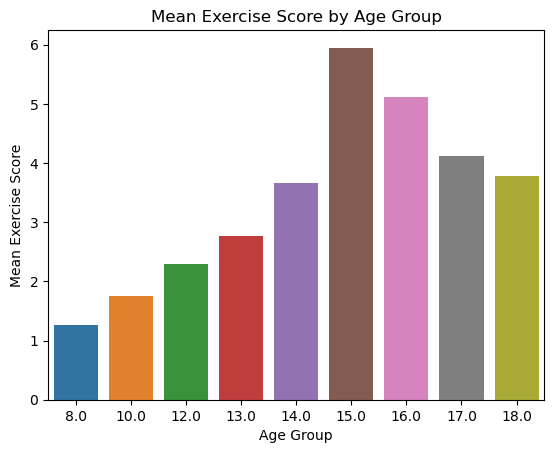

In [11]:

df['age_rounded'] = df['age'].round(0) # Round age to the nearest whole number
age_groups = df.groupby('age_rounded')['exercise'].mean() # Group the data into mean exercise for each age group
sns.barplot(x=age_groups.index, y=age_groups.values) # Create a bar graph to represent the means

# Create labels and titles
plt.xlabel('Age Group')
plt.ylabel('Mean Exercise Level')
plt.title('Mean Exercise Level by Age Group')
plt.show()


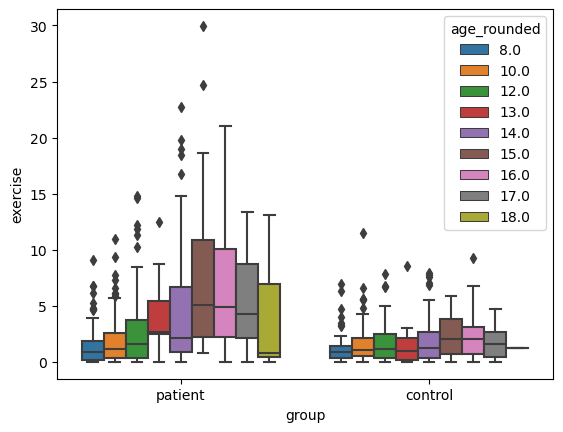

In [12]:
# Create a box plot representing exercise levels at each age for each group
df['age_rounded'] = df['age'].round(0) # Round age to nearest whole number
sns.boxplot(x="group", y="exercise", hue="age_rounded", data=df) # Create box plot using Seaborne
plt.show()

In [42]:
# Create a t-test analyzing the relation between exercise and group by age
def ttest_by_age(df):
    df['age_rounded'] = df['age'].round() # Round the age column to the nearest whole number
    age_groups = df.groupby('age_rounded') # Group the data by age
    results = []
    for age, group in age_groups:
        patient_exercise = group.loc[group['group'] == 'patient', 'exercise']
        control_exercise = group.loc[group['group'] == 'control', 'exercise']
        result = stats.ttest_ind(patient_exercise, control_exercise)
        results.append({'age_rounded': age, 't_value': result[0], 'p_value': result[1]})
    results_df = pd.DataFrame(results)
    return results_df


results = ttest_by_age(df)
print(results)



   age_rounded   t_value   p_value
0          8.0  0.945542  0.345379
1         10.0  0.915040  0.361142
2         12.0  2.305574  0.022232
3         13.0  2.437847  0.022555
4         14.0  2.996942  0.003285
5         15.0  2.807558  0.007755
6         16.0  2.986042  0.003944
7         17.0  2.618669  0.014531
8         18.0       NaN       NaN


C:\Users\ziegl\AppData\Local\Temp\ipykernel_13176\1678864216.py:9: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

C:\Users\ziegl\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\ziegl\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning:

invalid value encountered in double_scalars



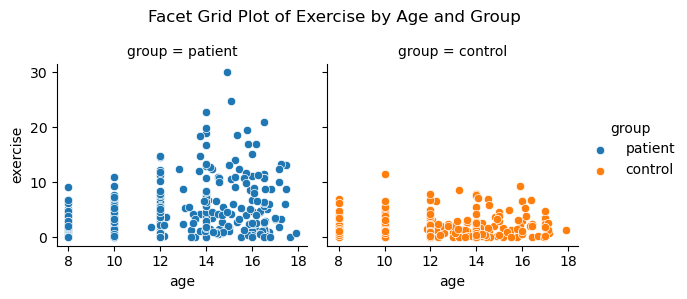

In [17]:
# Facet grid plot of exercise by age and group
g = sns.FacetGrid(df, col="group", hue="group") # Create the plot and its perameters
g.map(sns.scatterplot, "age", "exercise") # Set X and Y axis
g.add_legend() # Create a legend representing the different groups
plt.subplots_adjust(top=0.8) # Dimentions for sub titles
g.fig.suptitle('Facet Grid Plot of Exercise by Age and Group') # Create Title
plt.show()

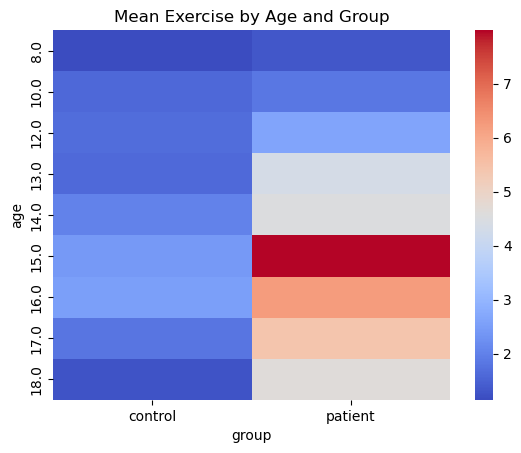

In [44]:
# Create a heat map from a pandas piviot table
#create piviot table with the vales representing exercise broken up by age and group. 
pt = pd.pivot_table(df, values='exercise', index='age', columns='group', aggfunc='mean')
# Create heat map
sns.heatmap(pt, cmap='coolwarm')
# Add title
plt.title('Mean Exercise by Age and Group')
plt.show()

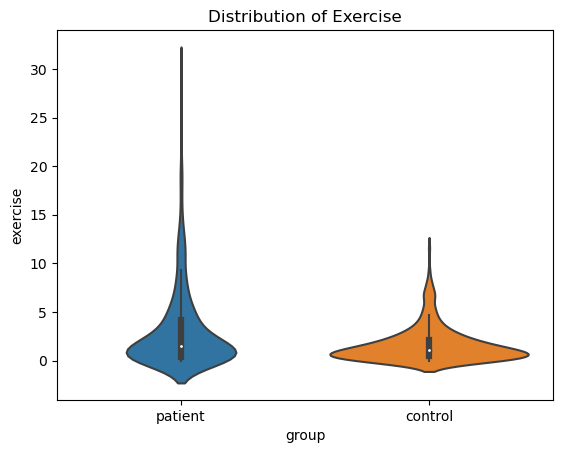

In [23]:
# Create a violin plot to better visualize distribution of exercise
# Create violin plot seperated by group that measures exercise
sns.violinplot(x='group', y='exercise', data=df)
# Create a title
plt.title('Distribution of Exercise')
plt.show()

In [21]:
# Create a sunburst plot to further analyze distribution of exercise by group and age
# Round the exercise column to the nearest hour
df['exercise_round'] = round(df['exercise'])

# Create the sunburst plot
fig = px.sunburst(df, path=['group', 'exercise_round'], values='age')

# Set the title and margins
fig.update_layout(title='Sunburst Plot of Group and Exercise', margin=dict(l=20, r=20, t=40, b=20))
fig.show()
